In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
from utils.processing import *
from utils.visualisation import *

In [9]:
df = pd.read_csv('../data/train.csv')
df = preprocess(df)

adfs = read_aux_csv('../data')
df = join_aux(df, adfs)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,cc_type_BN,cc_type_CR,cc_type_IEBP,cc_type_IEPB,cc_type_IHL,nearest_mall_distance_in_km,area_size,population,density,region
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,1,0,0,0,0,0.519278,0.3508,15120,43101.482326,c


prices in different regions differ greatly, where the price per size_sqft increases more sharply in the west and central regions compared to in the north region 

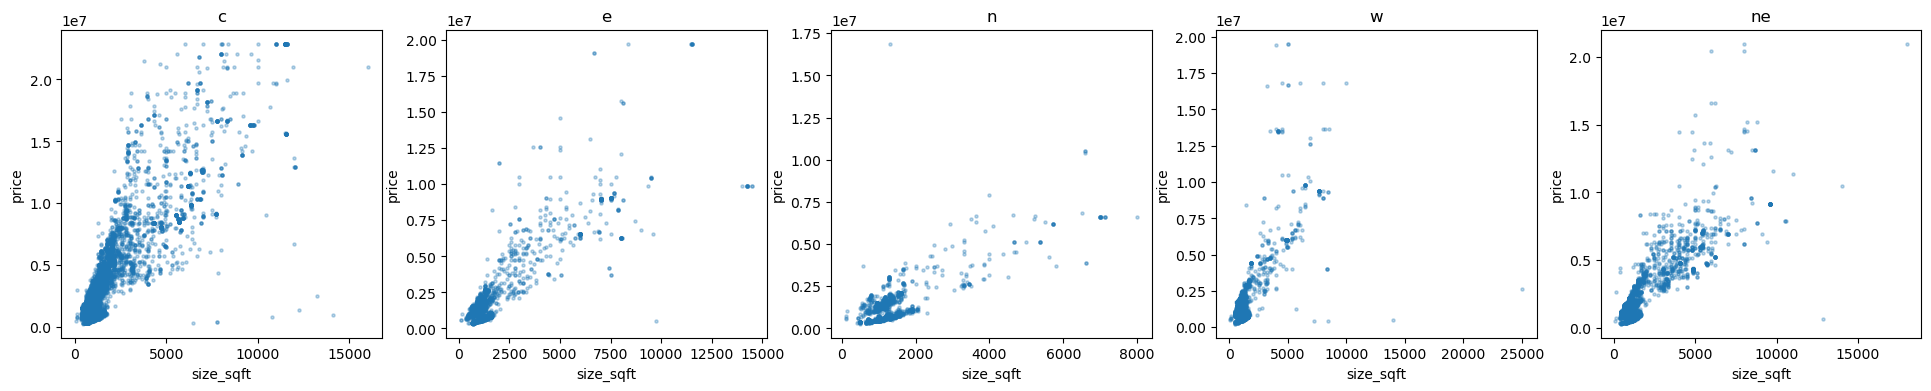

In [10]:
test = df.copy()
test['psf'] = test.price/test.size_sqft

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)
for i, c in enumerate(test.region.unique()):
    ax[i].scatter(x=test.size_sqft[test.region==c], y=test.price[test.region==c], s=5, alpha=0.3)
    ax[i].set_xlabel('size_sqft')
    ax[i].set_ylabel('price')
    ax[i].set_title(c)

plt.show()

price per size_sqft after 1990s increases more sharply than before 1990s

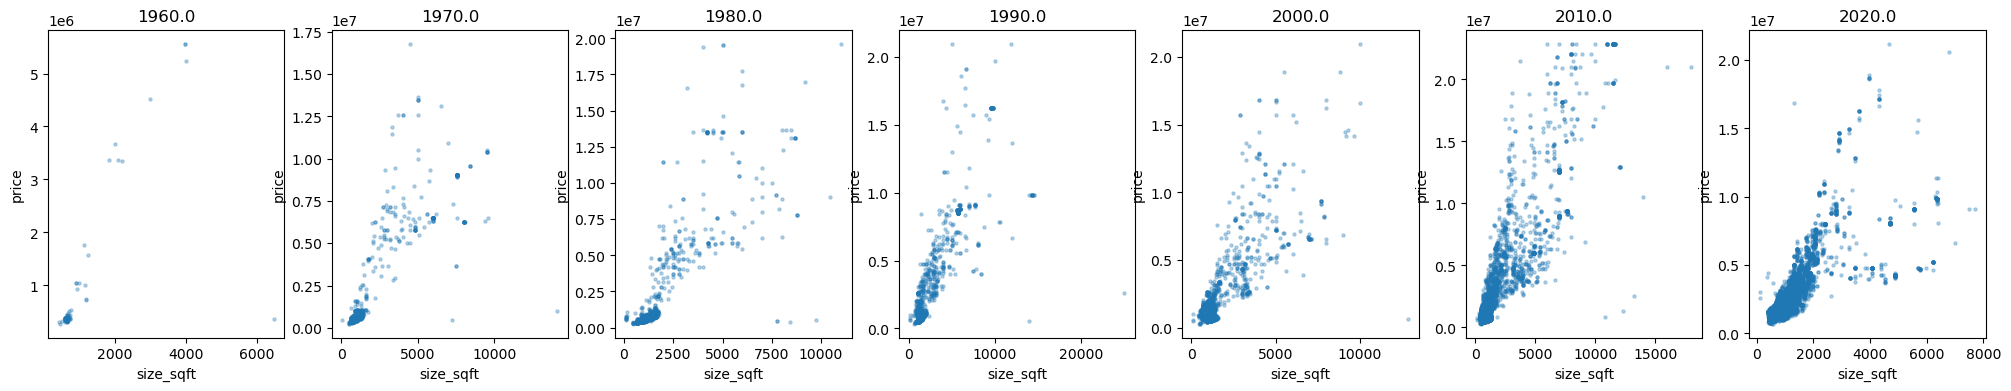

In [11]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots(1, len(built_year_categories))
fig.set_figwidth(25)
fig.set_figheight(4)
for i, c in enumerate(built_year_categories):
    ax[i].scatter(x=test.size_sqft[test.built_year==c], y=test.price[test.built_year==c], s=5, alpha=0.3)
    ax[i].set_xlabel('size_sqft')
    ax[i].set_ylabel('price')
    ax[i].set_title(c)

plt.show()

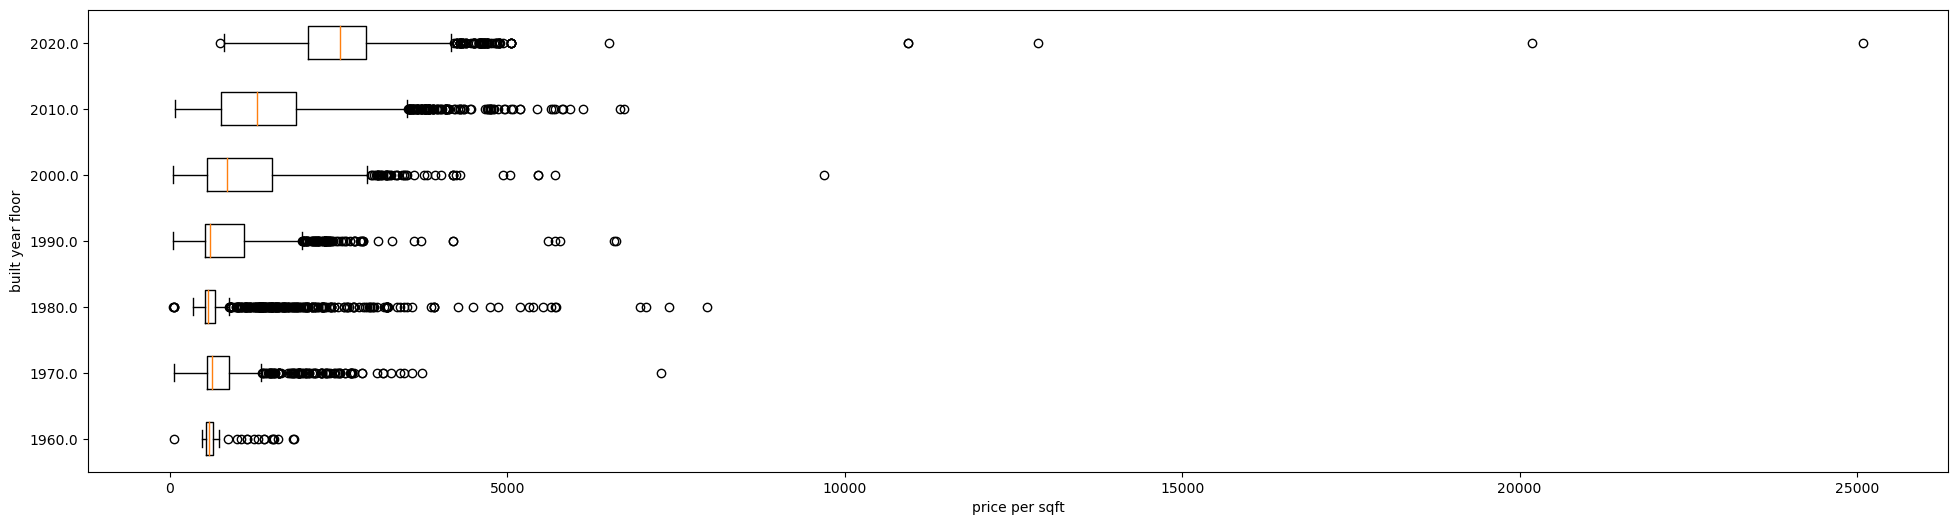

In [12]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(6)

ax.boxplot(x=[test.psf[test.built_year==c] for c in built_year_categories], vert=False)
ax.set_yticklabels(built_year_categories)
ax.set_xlabel('price per sqft')
ax.set_ylabel('built year floor')

plt.show()

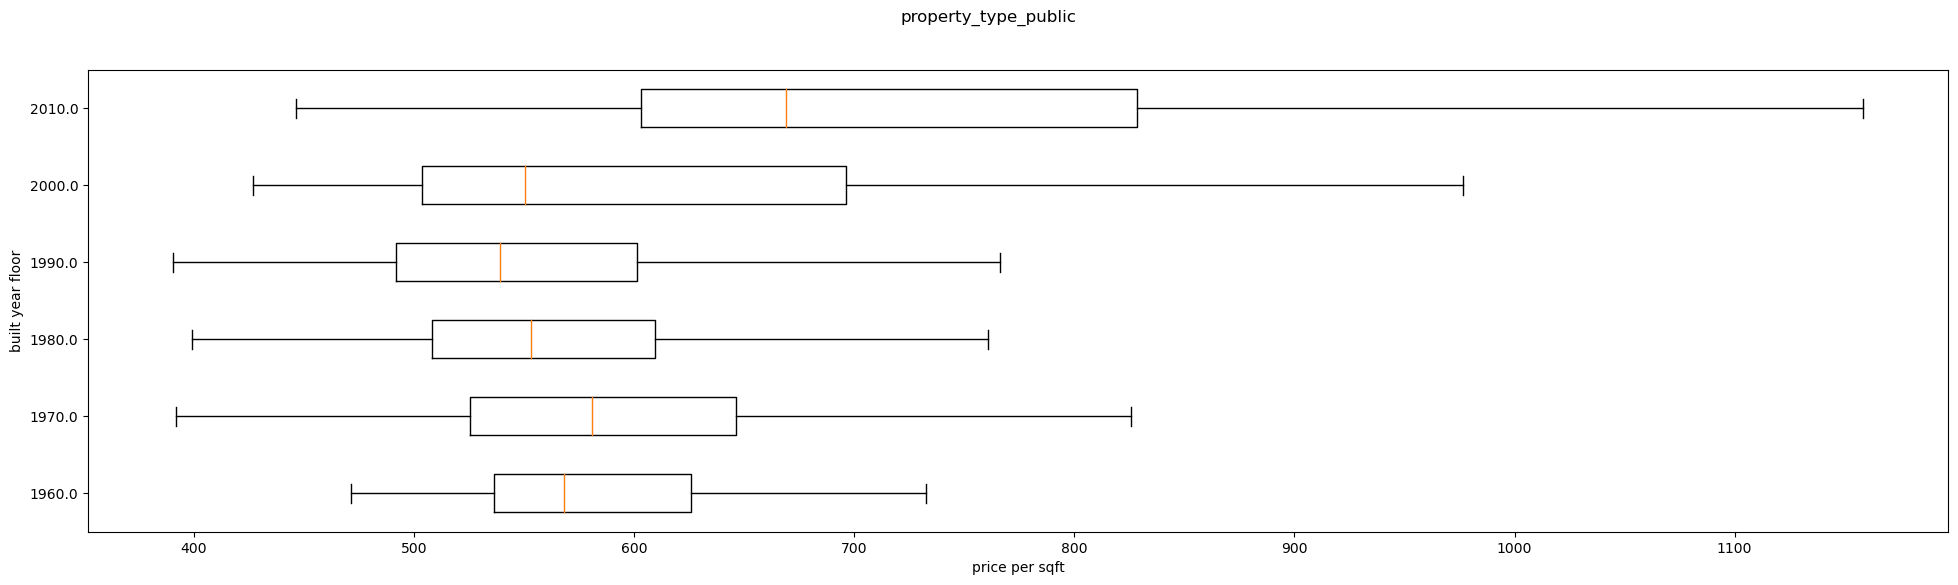

In [29]:
year_bin = 10

test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/year_bin)*year_bin
test=test[test.property_type_public==1]

built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(6)

ax.boxplot(x=[test.psf[test.built_year==c] for c in built_year_categories], vert=False, showfliers=False)
ax.set_yticklabels(built_year_categories)
ax.set_xlabel('price per sqft')
ax.set_ylabel('built year floor')

fig.suptitle('property_type_public')
plt.show()

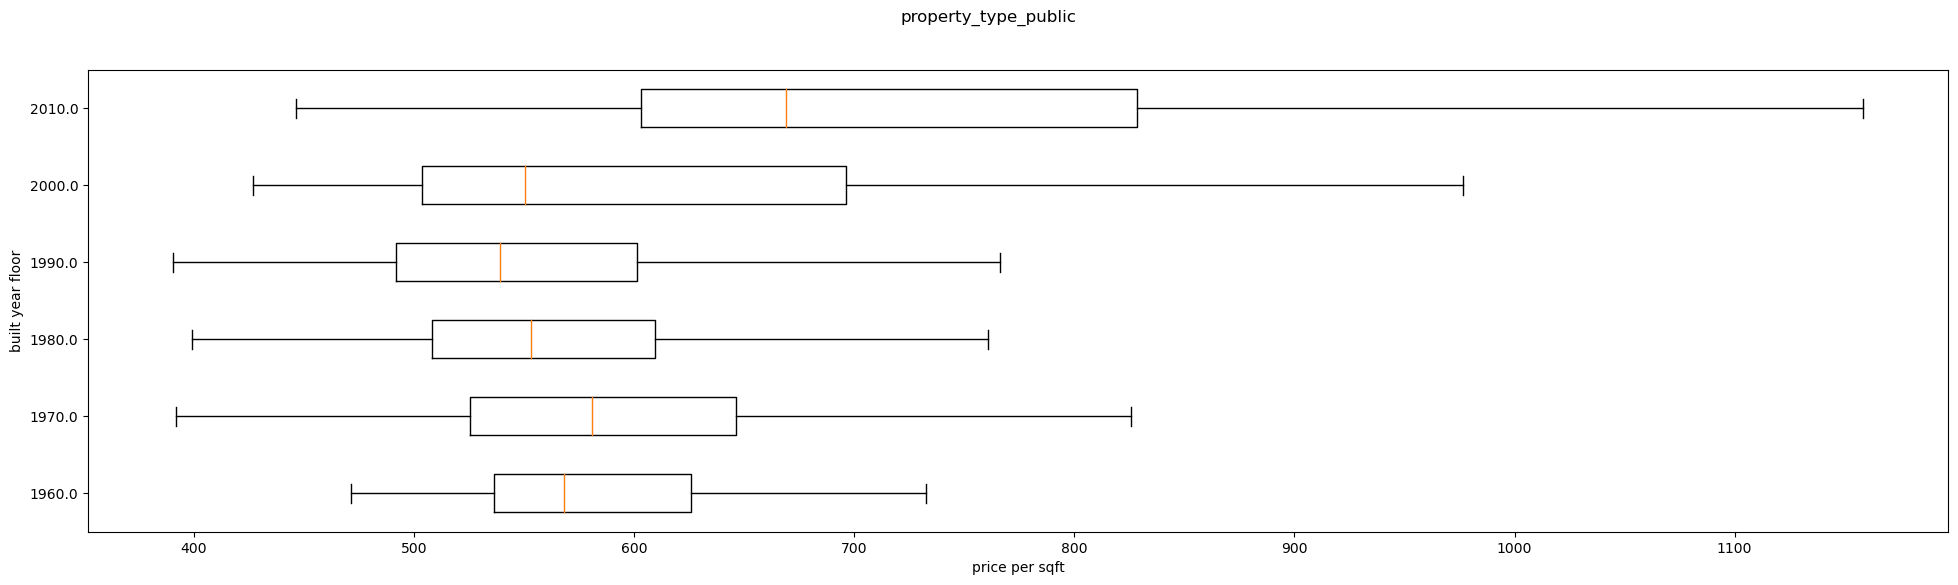

In [56]:
year_bin = 10

test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/year_bin)*year_bin
test=test[test.property_type_public==1]

built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(6)

ax.boxplot(x=[test.psf[test.built_year==c] for c in built_year_categories], vert=False, showfliers=False)
ax.set_yticklabels(built_year_categories)
ax.set_xlabel('price per sqft')
ax.set_ylabel('built year floor')

fig.suptitle('property_type_public')
plt.show()

In [30]:
test.groupby('built_year')['built_year'].count()

built_year
1960.0      84
1970.0     783
1980.0    1700
1990.0    1105
2000.0     916
2010.0    1689
Name: built_year, dtype: int64

In [31]:
test.groupby('built_year')[['num_beds', 'size_sqft', 'price']].median().reset_index()

,built_year,num_beds,size_sqft,price
0,1960.0,2.0,646.0,367500.0
1,1970.0,2.0,775.0,472500.0
2,1980.0,3.0,1108.0,577500.0
3,1990.0,3.0,1313.0,732900.0
4,2000.0,3.0,1184.0,645800.0
5,2010.0,3.0,1001.0,682500.0


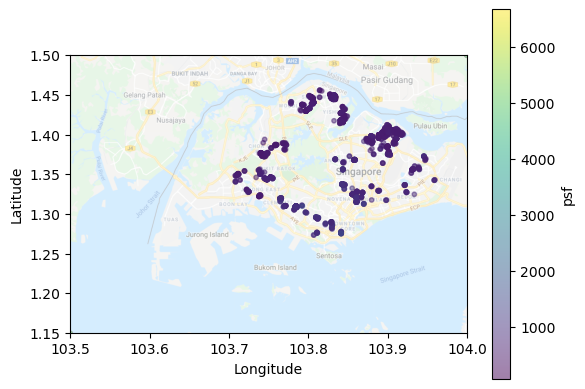

In [52]:
# import our image 
singapore_img = mpimg.imread('gmap.png')
# plot the data
ax = test[test.built_year==2010.].plot(
    kind="scatter", 
    x="lng", 
    y="lat", 
    c="psf",
    # figsize=(15,10),
    cmap='Reds',
    # colorbar=True, 
    alpha=0.5, 
    s=10
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5, 104., 1.15, 1.50], alpha=0.5)     
# add axis labels
plt.ylabel("Latitude")
plt.xlabel("Longitude")
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.show()

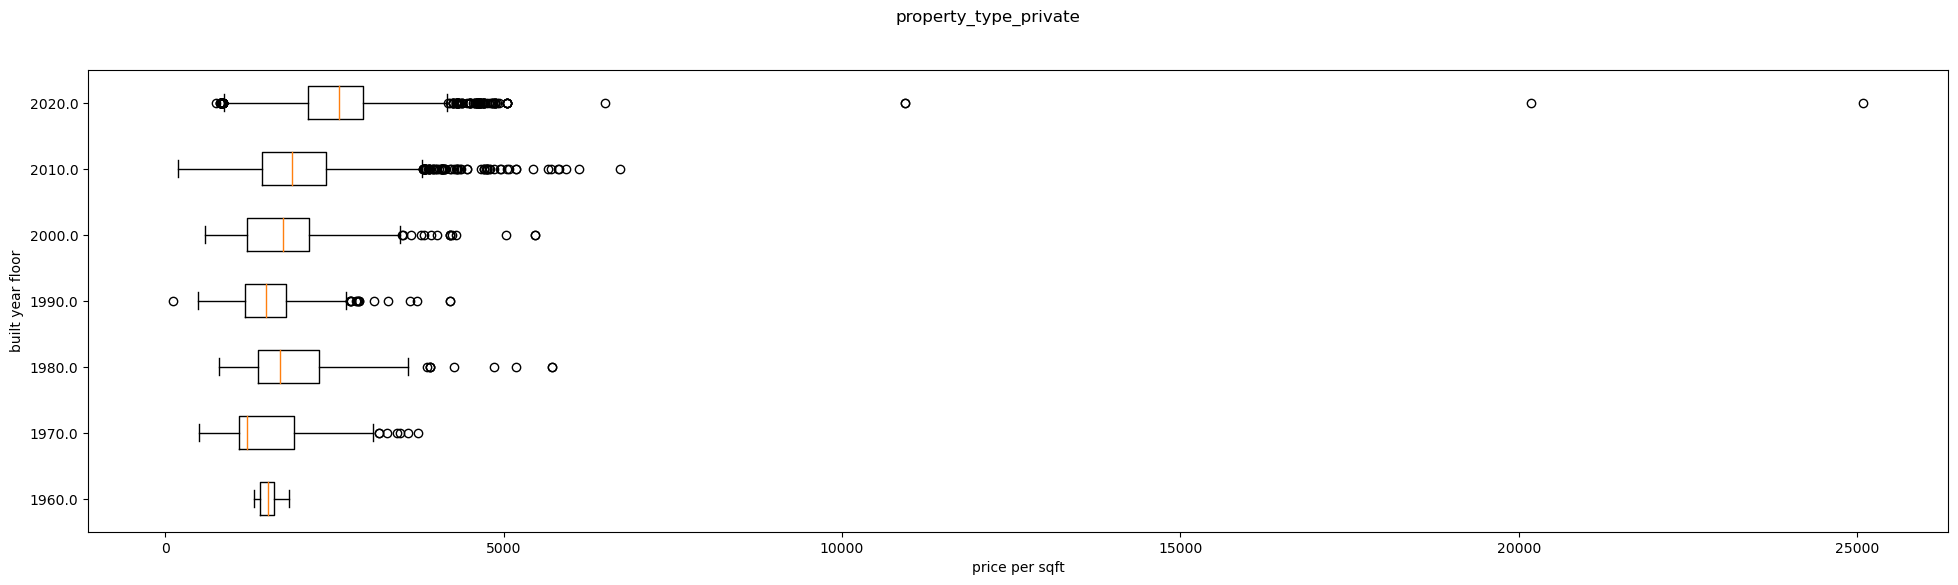

In [29]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_private==1]

built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(6)

ax.boxplot(x=[test.psf[test.built_year==c] for c in built_year_categories], vert=False)
ax.set_yticklabels(built_year_categories)
ax.set_xlabel('price per sqft')
ax.set_ylabel('built year floor')

fig.suptitle('property_type_private')
plt.show()

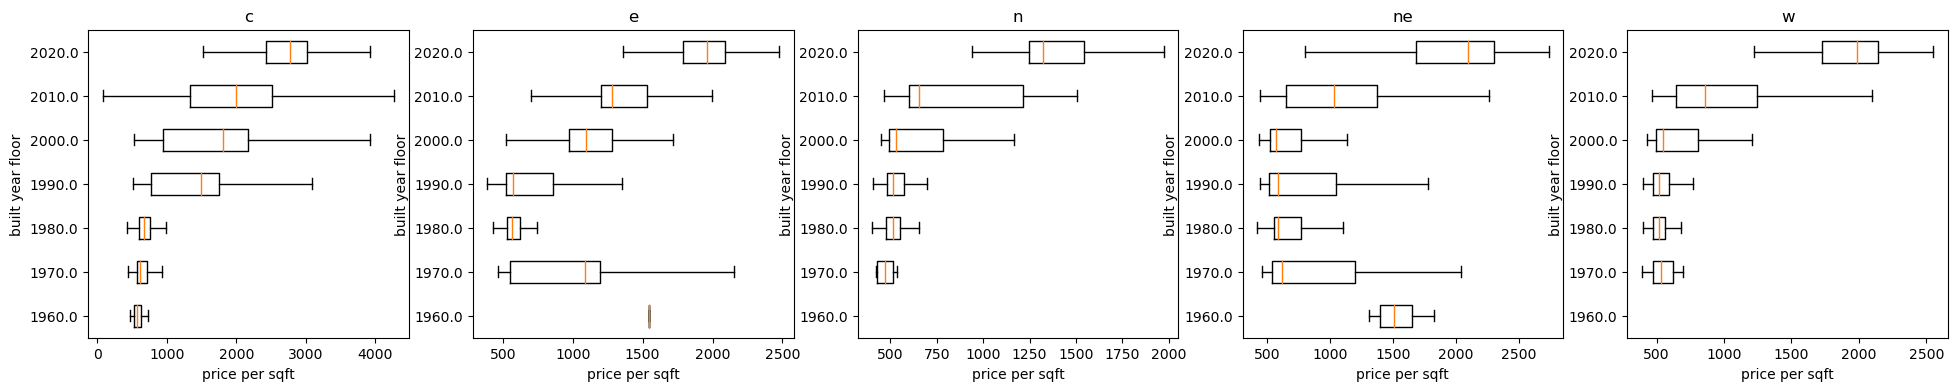

In [ ]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

plt.show()

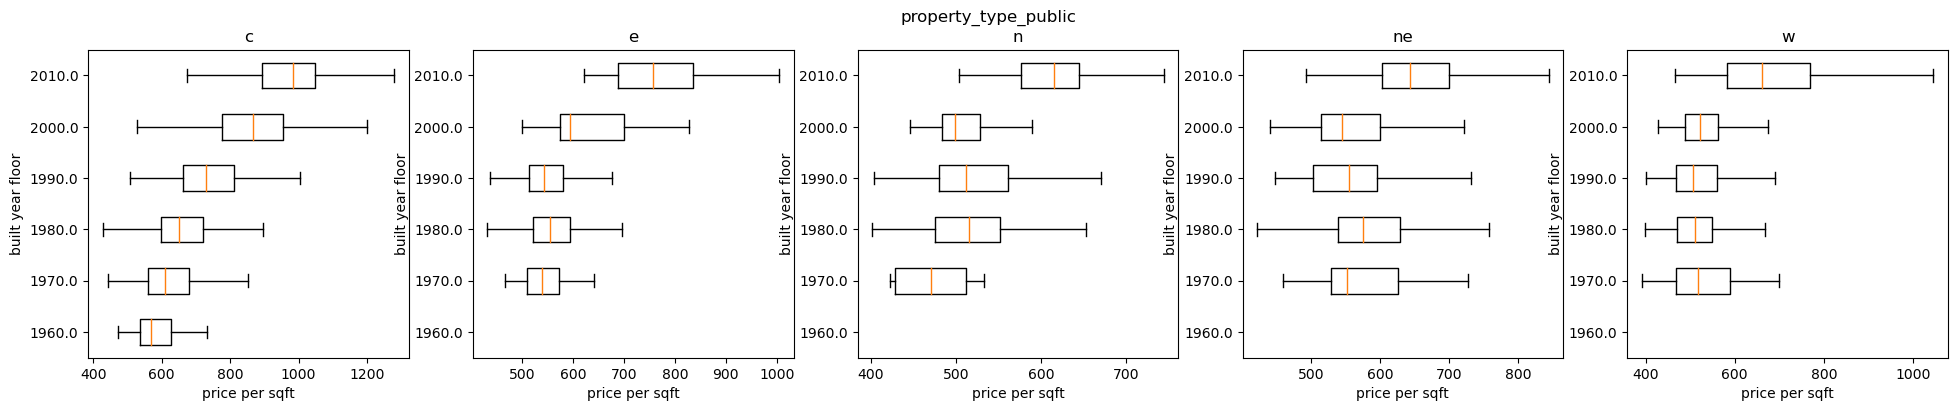

In [ ]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_public==1]

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

fig.suptitle('property_type_public')
plt.show()

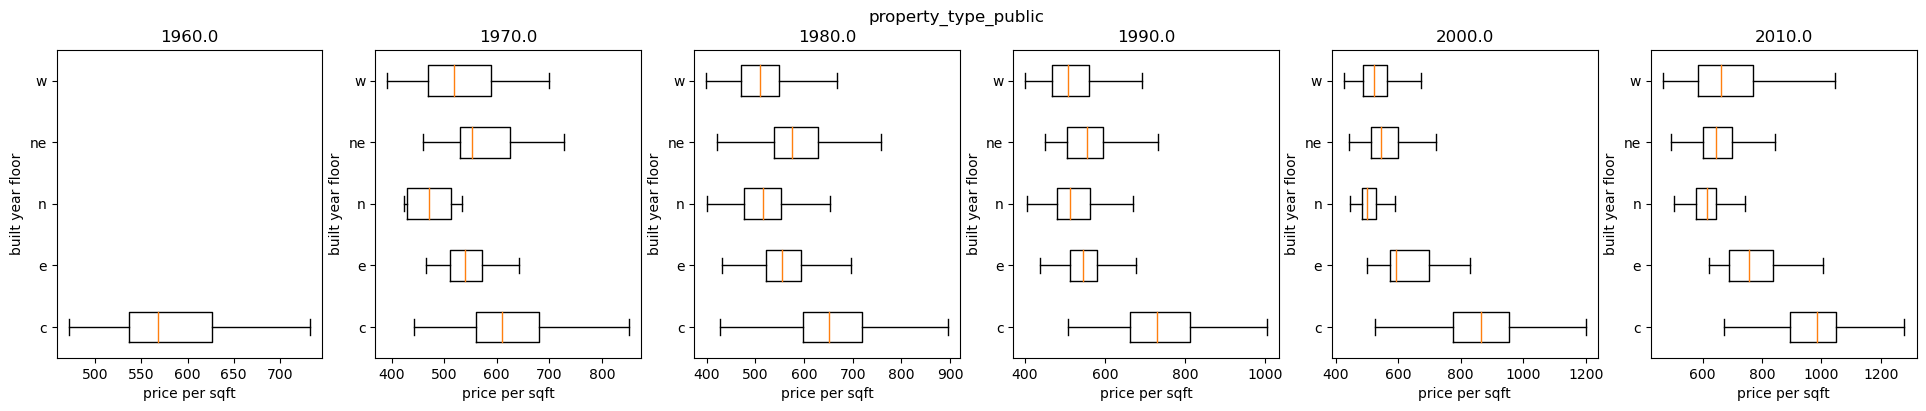

In [16]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_public==1]

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots(1, len(built_year_categories))
fig.set_figwidth(24)
fig.set_figheight(4)

for i, b in enumerate(built_year_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for r in region_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(region_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(b)

fig.suptitle('property_type_public')
plt.show()

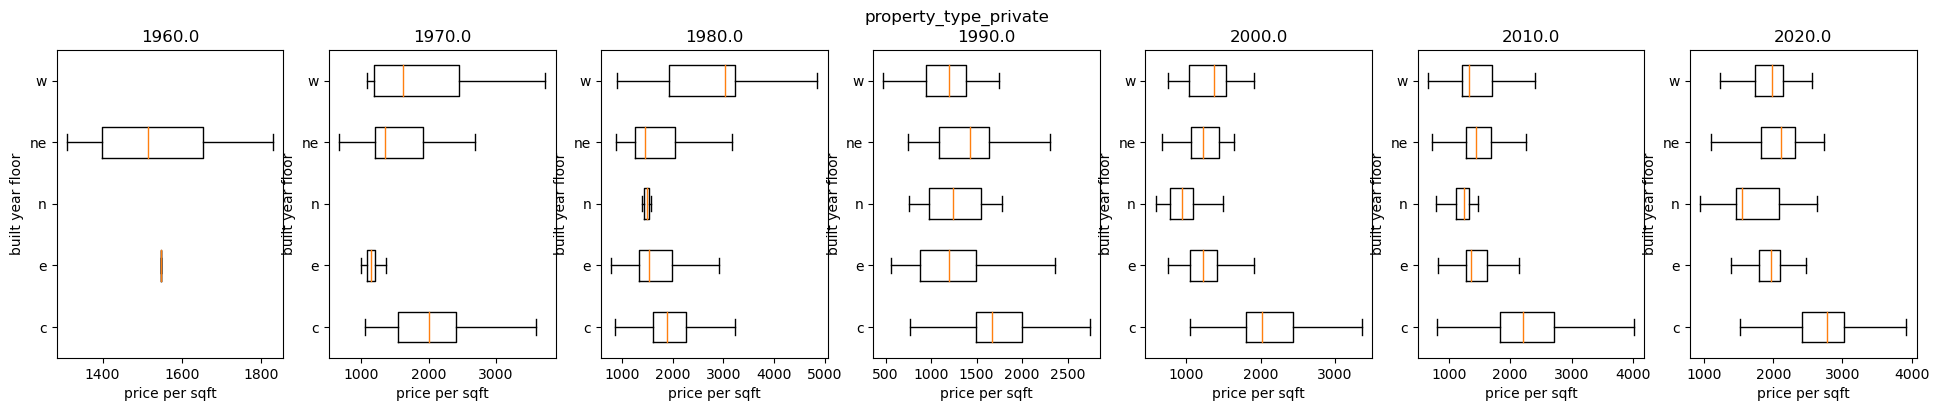

In [17]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_private==1]

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

fig, ax = plt.subplots(1, len(built_year_categories))
fig.set_figwidth(24)
fig.set_figheight(4)

for i, b in enumerate(built_year_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for r in region_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(region_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(b)

fig.suptitle('property_type_private')
plt.show()

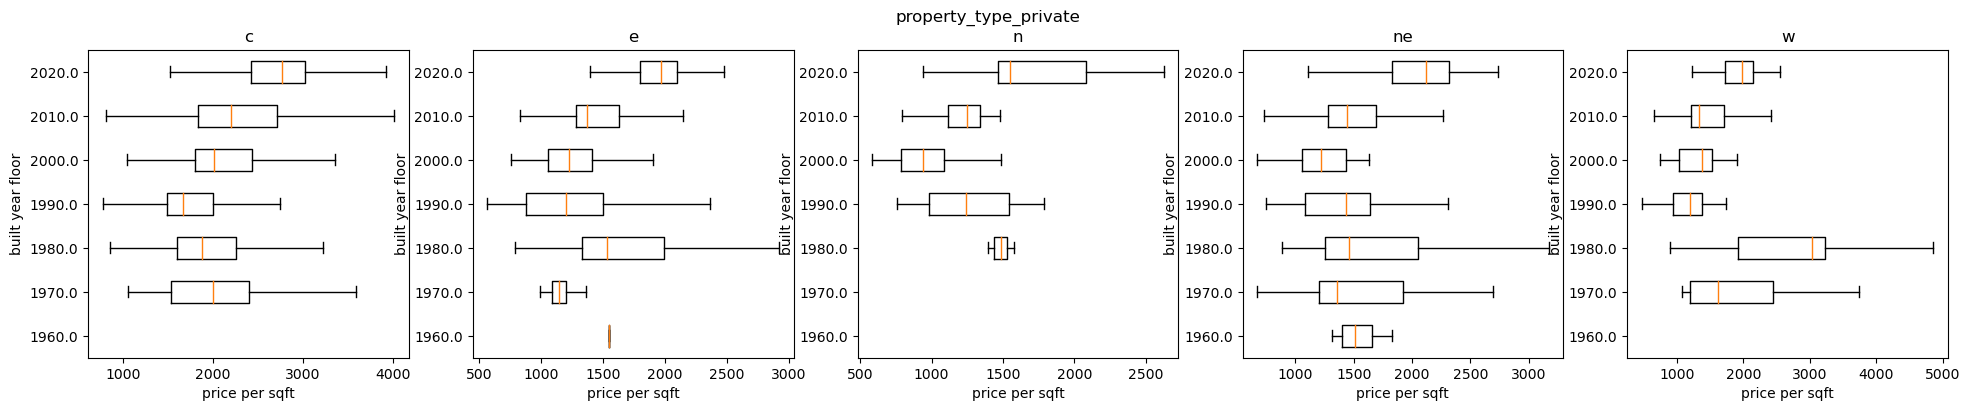

In [ ]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_private==1]

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

fig.suptitle('property_type_private')
plt.show()